## Manipulação dos arquivos

#### Em um primeiro momento vamos tratar os arquivos .txt de uma forma que possamos trabalhar com a biblioteca pandas.

In [86]:
import pandas as pd

In [87]:
# Arquivos de entrada referente a chuva
taioChuva = pd.read_fwf('txt\83050000TAIÓ_2962005-1442014-chuva.txt', header=None)
ituporangaChuva = pd.read_fwf('txt\83250000ITUPORANGA_3172005-1442014-chuva.txt', header=None)
riodosulChuva = pd.read_fwf('txt\83300200RIODOSUL-NOVO_2862005-1442014-Chuva.txt', header=None)

#TRASNFORMAÇÃO CHUVA - Inserindo header com a data e a chuva, e removido o indice 0 do dataframe (que continha o cabeçalho do arquivo original) 
taioChuva.columns = ['Data', 'Chuva Taio']
taioChuva = taioChuva.drop(taioChuva.index[0])

ituporangaChuva.columns = ['Data', 'Chuva Ituporanga']
ituporangaChuva = ituporangaChuva.drop(ituporangaChuva.index[0])

riodosulChuva.columns = ['Data', 'Chuva Rio do Sul']
riodosulChuva = riodosulChuva.drop(riodosulChuva.index[0])

In [88]:
# Arquivos de entrada referente ao nível
taioNivel = pd.read_fwf('txt\83050000TAIÓ_2962005-1442014-nível.txt', header=None)
ituporangaNivel = pd.read_fwf('txt\83250000ITUPORANGA_2962005-1032014-nível.txt', header=None)
riodosulNivel = pd.read_fwf('txt\83300200RIODOSUL-NOVO_2982005-1422014 -nível.txt', header=None)

#TRASNFORMAÇÃO NIVEL - Inserindo header com a data e o nivel, e removido o indice 0 do dataframe (que continha o cabeçalho do arquivo original) 
taioNivel.columns = ['Data', 'Nivel Taio']
taioNivel = taioNivel.drop(taioNivel.index[0])

ituporangaNivel.columns = ['Data', 'Nivel Ituporanga']
ituporangaNivel = ituporangaNivel.drop(ituporangaNivel.index[0])

riodosulNivel.columns = ['Data', 'Nivel Rio do Sul']
riodosulNivel = riodosulNivel.drop(riodosulNivel.index[0])

In [89]:
#Juntando os dataframes afins de chuvas
chuva1 = pd.merge(taioChuva, ituporangaChuva, how='inner', on='Data')
chuva = pd.merge(chuva1, riodosulChuva, how='inner', on='Data')

In [90]:
#Juntando os dataframes afins de niveis
nivel1 = pd.merge(taioNivel, ituporangaNivel, how='inner', on='Data')

nivel = pd.merge(nivel1, riodosulNivel, how='inner', on='Data')

In [91]:
#Juntando os dataframes de chuvas e niveis
cheias = pd.merge(chuva, nivel, how='inner', on='Data')
cheias.to_csv('cheias.csv', index=False)
cheias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114828 entries, 0 to 114827
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Data              114828 non-null  object
 1   Chuva Taio        105599 non-null  object
 2   Chuva Ituporanga  104411 non-null  object
 3   Chuva Rio do Sul  103831 non-null  object
 4   Nivel Taio        103570 non-null  object
 5   Nivel Ituporanga  79121 non-null   object
 6   Nivel Rio do Sul  109837 non-null  object
dtypes: object(7)
memory usage: 7.0+ MB


#### Após juntar os arquivos em um único dataframe podemos notar que os dados das colunas estão sinalizados como tipo objeto, sendo que tais são valores numéricos, faremos então a transformação dos dados.

In [92]:
# Conversão dos tipos de dados de objetos para numericos
cheias['Chuva Taio'] = cheias['Chuva Taio'].astype(float)
cheias['Chuva Ituporanga'] = cheias['Chuva Ituporanga'].astype(float)
cheias['Chuva Rio do Sul'] = cheias['Chuva Rio do Sul'].astype(float)

cheias['Nivel Taio'] = cheias['Nivel Taio'].astype(float)
cheias['Nivel Ituporanga'] = cheias['Nivel Ituporanga'].astype(float)
cheias['Nivel Rio do Sul'] = cheias['Nivel Rio do Sul'].astype(float)


# Conversao da data para datetime
cheias['Data'] = pd.to_datetime(cheias['Data'])

cheias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114828 entries, 0 to 114827
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Data              114828 non-null  datetime64[ns]
 1   Chuva Taio        105599 non-null  float64       
 2   Chuva Ituporanga  104411 non-null  float64       
 3   Chuva Rio do Sul  103831 non-null  float64       
 4   Nivel Taio        103570 non-null  float64       
 5   Nivel Ituporanga  79121 non-null   float64       
 6   Nivel Rio do Sul  109837 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.0 MB


#### Para facilitar a manipulação dos dados, renomeamos as colunas removendo os espaços e adotando as siglas nv = Nivel e cv = Chuva.

In [93]:

cheias.rename(
    columns={
        'Nivel Taio': 'nv_taio', 
        'Nivel Ituporanga': 'nv_ituporanga', 
        'Nivel Rio do Sul': 'nv_rio-do-sul'
    }, 
    inplace=True
)
cheias.rename(
    columns={
        'Chuva Taio':'cv_taio',
        'Chuva Ituporanga':'cv_ituporanga',
        'Chuva Rio do Sul':'cv_rio-do-sul'
    },
    inplace=True
)

cheias.rename(columns={'Data': 'data'}, inplace=True)

cheias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114828 entries, 0 to 114827
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   data           114828 non-null  datetime64[ns]
 1   cv_taio        105599 non-null  float64       
 2   cv_ituporanga  104411 non-null  float64       
 3   cv_rio-do-sul  103831 non-null  float64       
 4   nv_taio        103570 non-null  float64       
 5   nv_ituporanga  79121 non-null   float64       
 6   nv_rio-do-sul  109837 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.0 MB


## Analise dos dados

#### Em um primeiro momento vamos gerar uma análise em cima dos dados filtrados acima, para entender melhor os mesmos. O objetivo é montar um modelo para prever o nível do rio de Rio do Sul.

#### O presente dataset contem dados dos neveis dos rios e a precipitação das chuvas das cidades de Rio do Sul, Taió e Ituporanga.

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

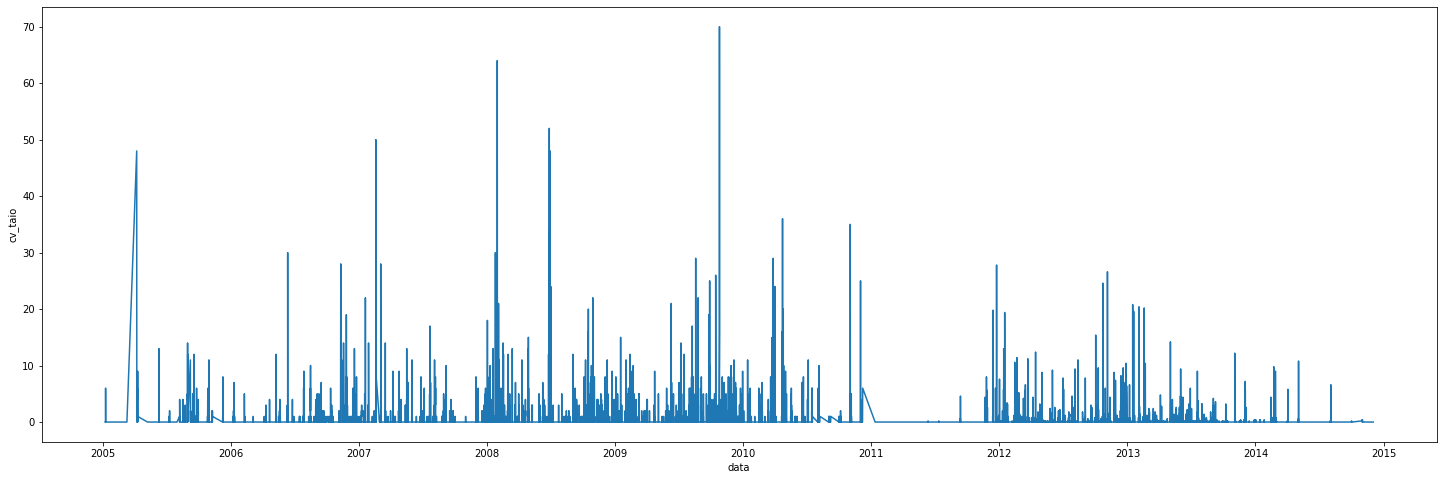

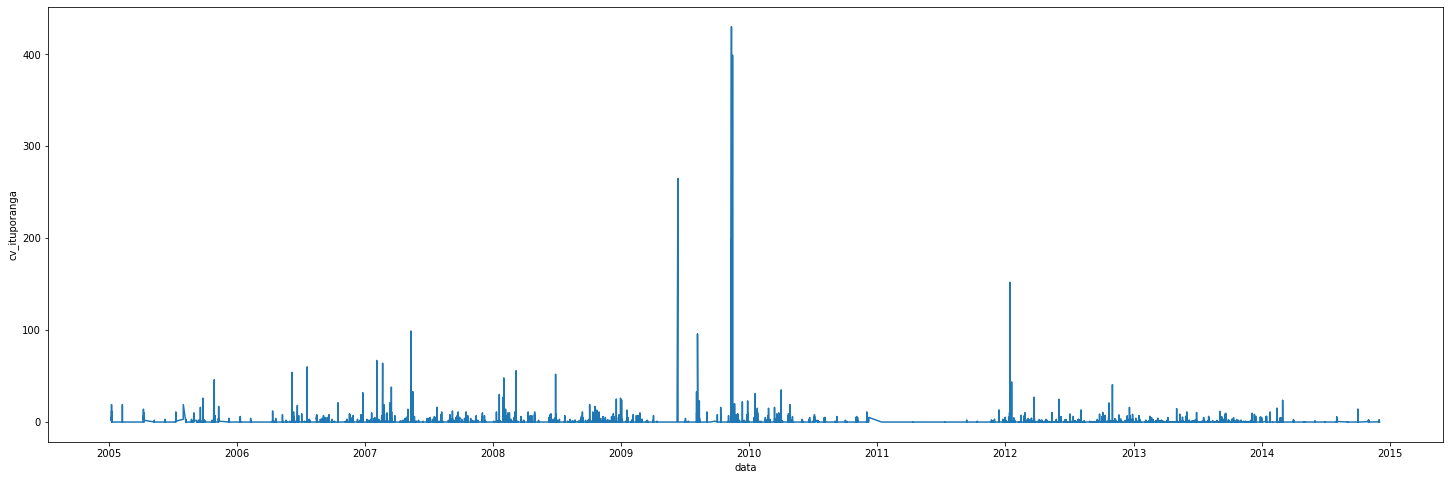

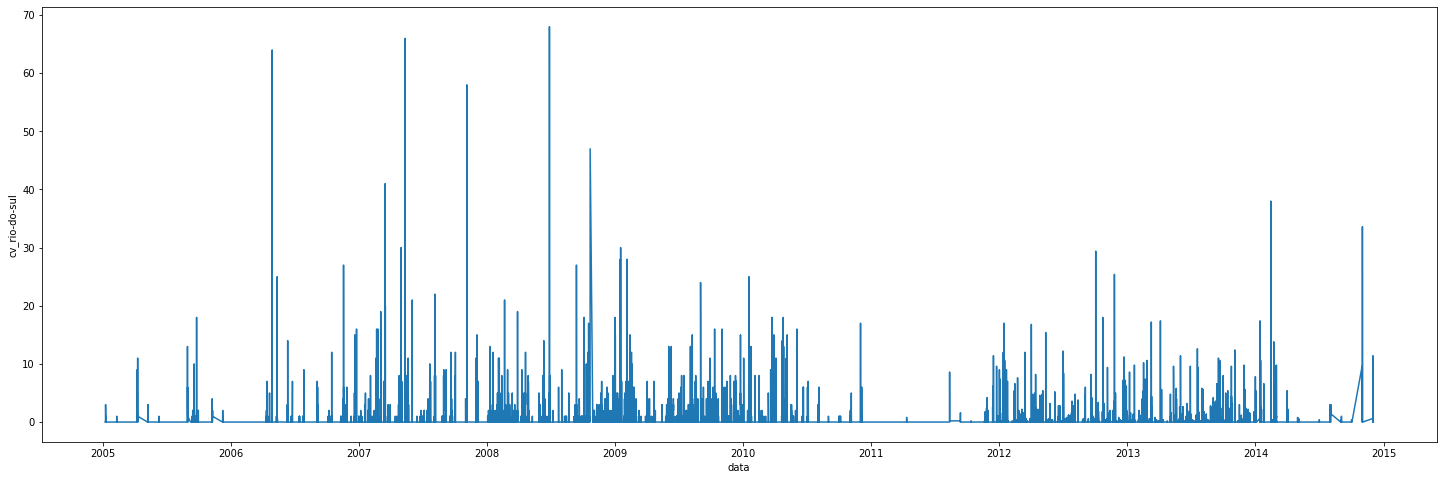

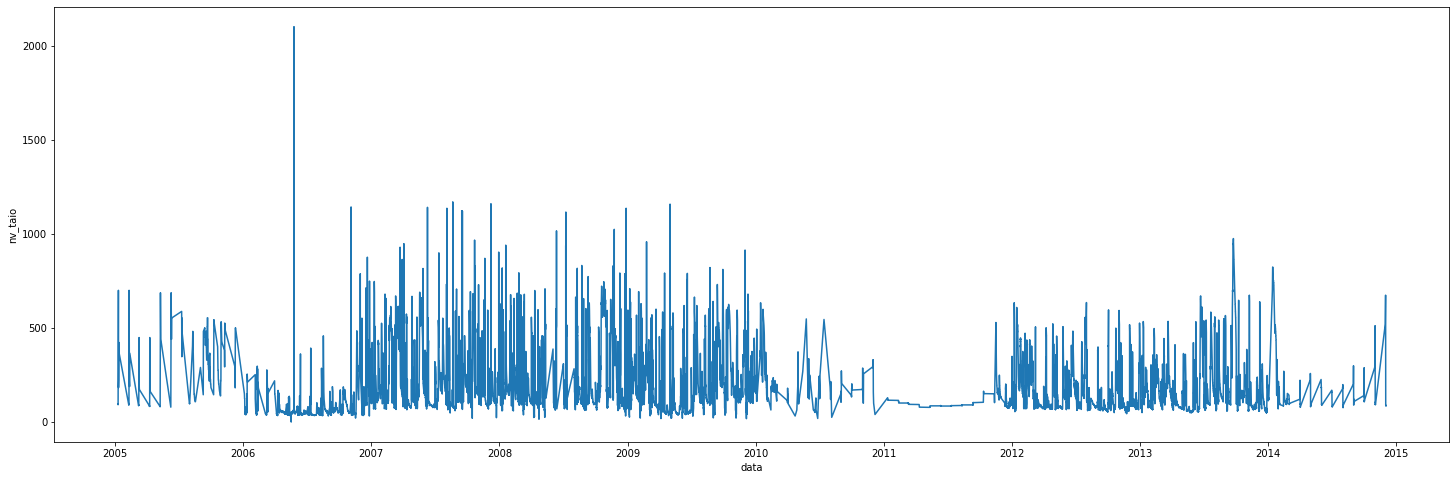

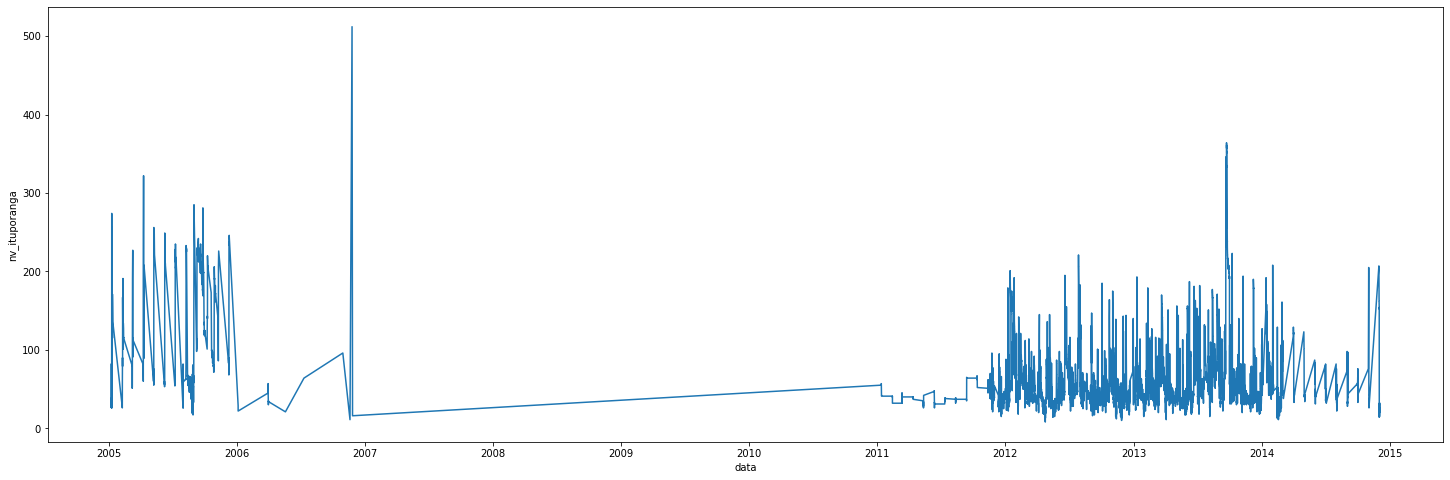

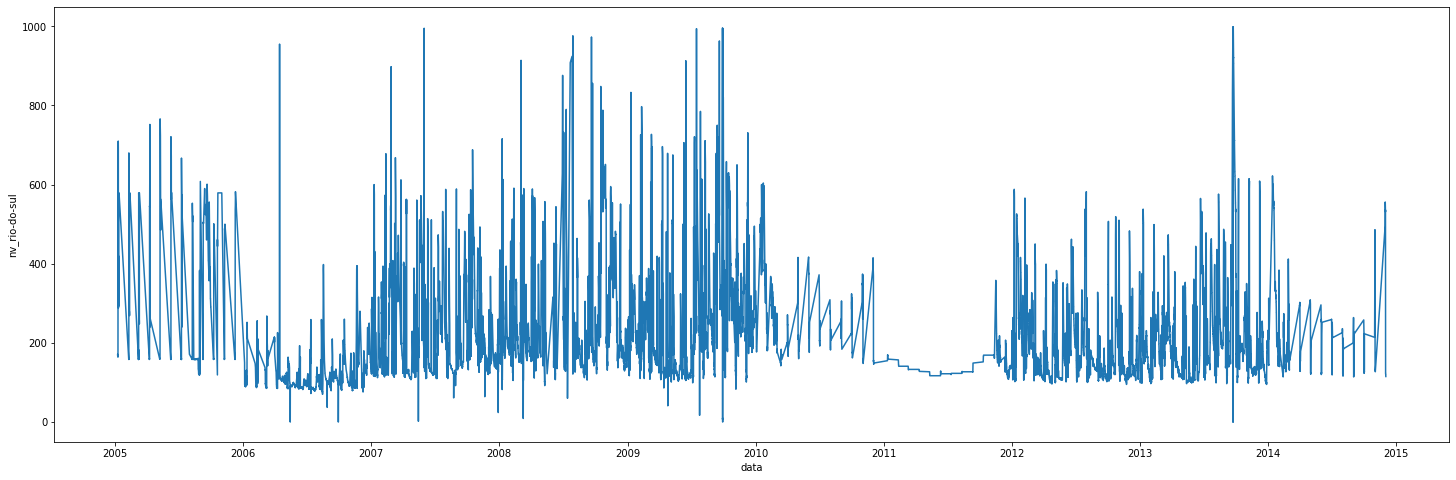

In [95]:
cols = cheias[['cv_taio', 'cv_ituporanga', 'cv_rio-do-sul', 'nv_taio', 'nv_ituporanga', 'nv_rio-do-sul']]

for col in cols:
    plt.figure(figsize=(25, 8))
    sns.lineplot(x='data', y=col, data=cheias)
    plt.show()


#### Em uma análise superficial dos gráficos acima, podemos notar algumas possíveis inconformidades, principalmente no gráfico que mostra os dados respectivos ao nível de Ituporanga, onde podemos notar um alto pico próximo do ano de 2007 e um período muito 'estável' entre 2007 e 2011. Podendo assim sinalizar, que os dados desse período podem estar discrepantes.

### Para melhor analisar a correlação entre as variáveis ​​no dataframe, vamos plotar uma tabela de correlações.

In [96]:
corr = cheias.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,cv_taio,cv_ituporanga,cv_rio-do-sul,nv_taio,nv_ituporanga,nv_rio-do-sul
cv_taio,1.00,0.07,0.23,0.03,0.04,0.03
cv_ituporanga,0.07,1.00,0.10,0.01,0.05,0.02
cv_rio-do-sul,0.23,0.10,1.00,0.04,0.07,0.04
nv_taio,0.03,0.01,0.04,1.00,0.81,0.90
nv_ituporanga,0.04,0.05,0.07,0.81,1.00,0.84
nv_rio-do-sul,0.03,0.02,0.04,0.90,0.84,1.00


#### Como podemos ver na tabela, o nível de Rio do Sul tem uma grande correlação positiva com os níveis do rio de Taió e Ituporanga, e uma fraca correlação com as informações de chuva das cidades. Levando essa informação em consideração, vamos utilizar no modelo somente as colunas referentes aos níveis do rio de cada cidade, devido ao nosso objetivo que é prever as cheias do rio de Rio do Sul.

In [97]:
niveis = cheias[['data', 'nv_taio', 'nv_ituporanga', 'nv_rio-do-sul']]
niveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114828 entries, 0 to 114827
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   data           114828 non-null  datetime64[ns]
 1   nv_taio        103570 non-null  float64       
 2   nv_ituporanga  79121 non-null   float64       
 3   nv_rio-do-sul  109837 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.4 MB


#### Podemos verificar que existem diversos valores nulos, nas colunas. Portanto, vamos remover as linhas com valores nulos.

In [98]:
niveis = niveis.dropna()
niveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73552 entries, 6 to 113752
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           73552 non-null  datetime64[ns]
 1   nv_taio        73552 non-null  float64       
 2   nv_ituporanga  73552 non-null  float64       
 3   nv_rio-do-sul  73552 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.8 MB


#### Para melhor visualizar os dados presentes no dataset, vamos gerar um gráfico para verificar a distribuição dos dados.

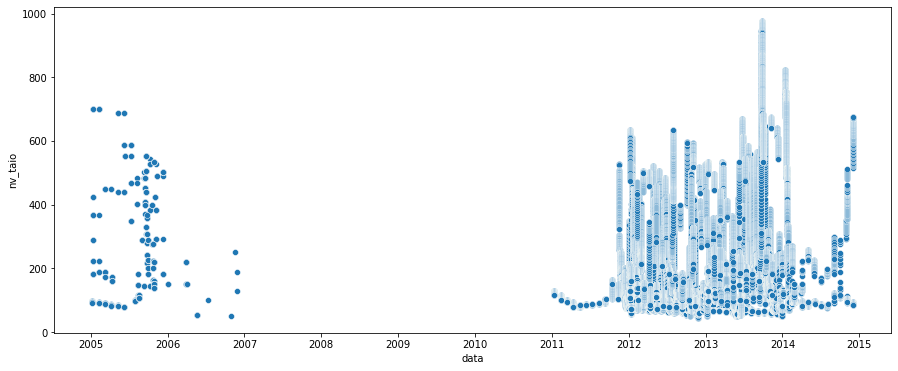

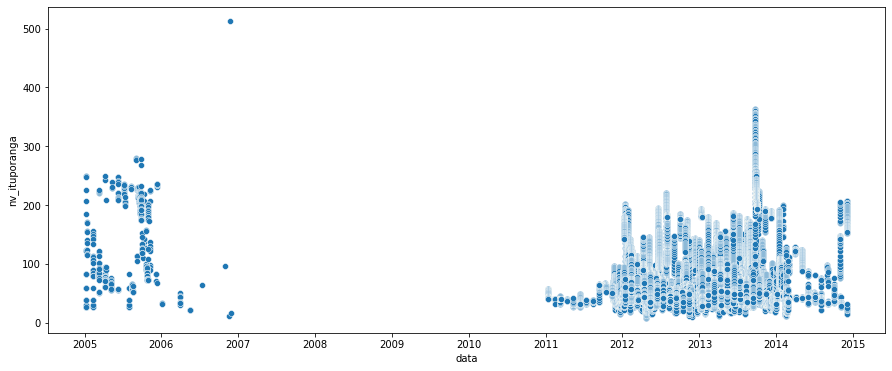

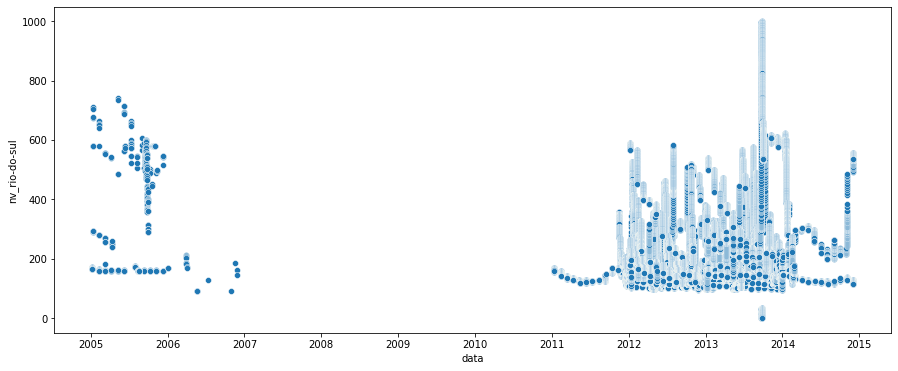

In [99]:
cols = niveis[['nv_taio', 'nv_ituporanga', 'nv_rio-do-sul']]
for col in cols:
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x='data', y=col, data=niveis)
    plt.show()


#### Ao analisarmos o gráfico podemos notar que existe um período, aproximadamente entre 2007 e 2011, no qual não temos dados (ou um volume relevante), como teorizado anteriormente. Logo, vamos filtrar o dataset para nos trazer dados de 2011 para frente.

In [100]:
dataMaior = niveis[(niveis['data'] < '2011-01-01 00:00:00')].index
niveis.drop(dataMaior, inplace = True)
niveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73115 entries, 36105 to 113752
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           73115 non-null  datetime64[ns]
 1   nv_taio        73115 non-null  float64       
 2   nv_ituporanga  73115 non-null  float64       
 3   nv_rio-do-sul  73115 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.8 MB


#### Por meio desta analise, confirmamos a hipótese de que o período anterior a 2011 não teve um volume grande de dados, pegando a análise anterior menos esta temos 437 amostras de diferença.

#### Vamos gerar um modelo de predição inicial, com os níveis dos rios, dividindo nosso conjunto no em 80/20 (80% das amostras para o treinamento e 20% para testes do modelo).

In [101]:
x = niveis[['nv_taio', 'nv_ituporanga']]
y = niveis[['nv_rio-do-sul']] 

In [102]:
# IMPORTAÇÃO DOS MODULOS DE PREDIÇÃO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [104]:
regressaoMultipla = LinearRegression()
regressaoMultipla.fit(x_train, y_train)

y_previsto = regressaoMultipla.predict(x_test)

#### Para se ter uma melhor visualização do ajuste do nosso modelo, vamos gerar um gráfico de nivel real vs previsto.

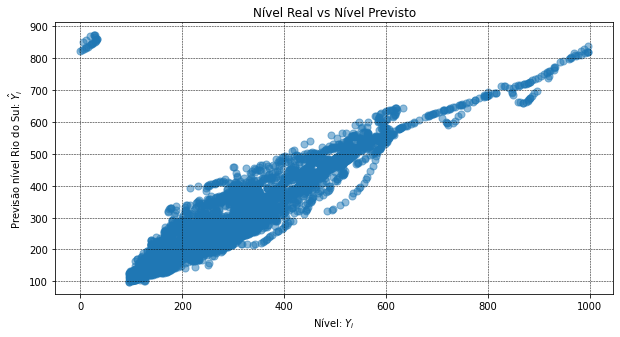

In [105]:
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_previsto, s = 50, alpha = 0.5)

plt.xlabel("Nível: $Y_i$")
plt.ylabel("Previsão nível Rio do Sul: $\hat{Y}_i$")
plt.title("Nível Real vs Nível Previsto")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

#### Ao analisar o gráfico podemos perceber um certo agrupamento distante, possivelmente sinalizando que com o modelo está com dificuldades de prever valores aproximadamente abaixo de 90cm. Para melhor visualizar, vamos gerar um gráfico dos resíduos.

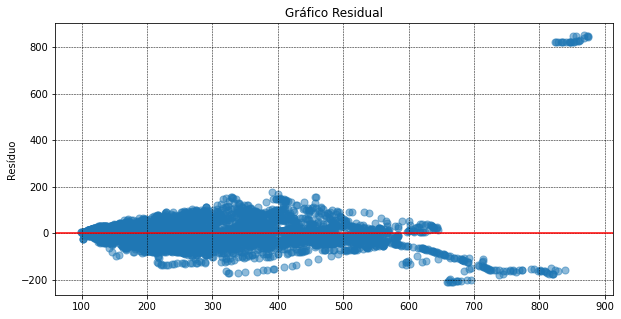

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(y_previsto, y_previsto - y_test, s = 50, alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Resíduo")
plt.title("Gráfico Residual")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

#### Antes de realizar quaisquer outras alterações irei realizar o processo de normalização dos dados, pois tal problemática pode ser resolvida por este meio.

In [107]:
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()

In [108]:
xNM = minMax.fit_transform(x)
yNM = minMax.fit_transform(y)

#### Realizado as normalizações, vamos gerar novamente o modelo.

In [109]:
x_train_nm, x_test_nm, y_train_nm, y_test_nm = train_test_split(xNM, yNM, train_size = 0.8, test_size = 0.2)

In [110]:
regressaoMultiplaNormalizada = LinearRegression()
regressaoMultiplaNormalizada.fit(x_train_nm, y_train_nm)

y_previsto_nm = regressaoMultiplaNormalizada.predict(x_test_nm)

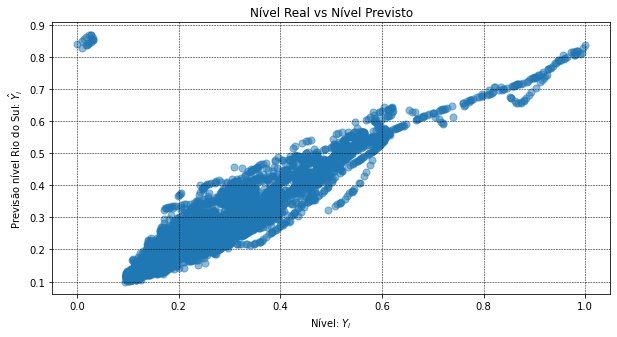

In [111]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_nm, y_previsto_nm, s = 50, alpha = 0.5)

plt.xlabel("Nível: $Y_i$")
plt.ylabel("Previsão nível Rio do Sul: $\hat{Y}_i$")
plt.title("Nível Real vs Nível Previsto")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

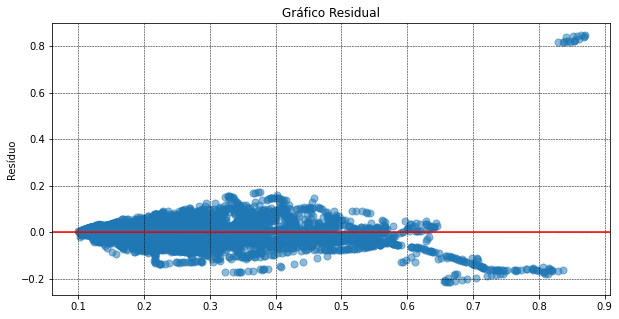

In [112]:
plt.figure(figsize=(10, 5))
plt.scatter(y_previsto_nm, y_previsto_nm - y_test_nm, s = 50, alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Resíduo")
plt.title("Gráfico Residual")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

#### Como podemos notar, a normalização não surtiu tanto efeito nos dados. Logo, vamos adotar a estratégia de remoção dos dados dos níveis menores que 90cm.

In [113]:
nivelMenor = niveis[(niveis['nv_rio-do-sul'] < 90)].index
niveis.drop(nivelMenor, inplace=True)

x2 = niveis[['nv_taio', 'nv_ituporanga']]
y2 = niveis[['nv_rio-do-sul']] 

In [114]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2)

In [115]:
regressaoMultipla2 = LinearRegression()
regressaoMultipla2.fit(x2_train, y2_train)

y2_previsto = regressaoMultipla2.predict(x2_test)

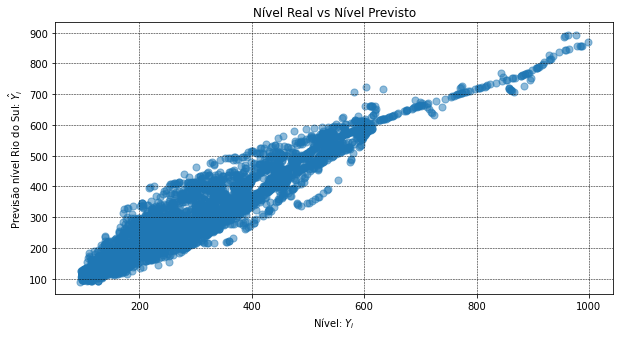

In [116]:
plt.figure(figsize=(10, 5))
plt.scatter(y2_test, y2_previsto, s = 50, alpha = 0.5)

plt.xlabel("Nível: $Y_i$")
plt.ylabel("Previsão nível Rio do Sul: $\hat{Y}_i$")
plt.title("Nível Real vs Nível Previsto")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

#### Após a estratégia adotada anteriormente, notamos que o conjunto residual distante, não está mais presente. Como forma de melhor entender a precisão e acurácia do modelo, vamos gerar métricas de avaliação do modelo.

In [117]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error


In [118]:
R2 = r2_score(y2_test, y2_previsto)
print("R2: {:.4f}%".format(R2 * 100))

R2: 93.8378%


In [119]:
R2_ADJ = (1 - ((1 - r2_score(y2_test, y2_previsto)) * (len(y2_test) - 1)) / (len(y2_test) - x2_train.shape[1] - 1))
print("R2 ajustado: {:.4f}%".format(R2_ADJ * 100))

R2 ajustado: 93.8370%


In [120]:
MSE = mean_squared_error(y2_test, y2_previsto)
print("MSE: {:.4f}".format(MSE))

MSE: 882.6537


In [121]:
RMSE = mean_squared_error(y2_test, y2_previsto, squared=False) 
print("RMSE: {:.4f}".format(RMSE))

RMSE: 29.7095


In [122]:
MAPE = np.mean(np.abs((y2_test - y2_previsto) / y2_test), axis=0) * 100
print("MAPE: %.4f" % MAPE + "%")

MAPE: 8.6194%


## Notamos que o R2 do nosso modelo não está perfeito, porem, esta aceitável. Outrossim, com o MAPE que obtivemos aproximadamente 8.65%, logo, em média o modelo erra em 8.65% do valor real previsto.